In [17]:
from pipecraft.sources import DataSource, DataFrame
from pipecraft.sinks import DataSink
from pipecraft.processors import DataProcessor


In [2]:
from dataclasses import dataclass
from typing import Iterable, Optional
import time
import threading
# --------------------------------------------------
# Example concrete implementations:
# --------------------------------------------------

# Define a simple data class as our DataFrame.
@dataclass
class MyFrame:
    value: int

# 1. A simple DataSource that generates MyFrame objects.
class SimpleSource(DataSource[MyFrame]):
    def __init__(self, total: int = 5, delay: float = 0.2):
        self.remaining = total
        self.delay = delay
        self.lock = threading.Lock()
        super().__init__()
    
    def fetch(self) -> MyFrame:
        with self.lock:
            if self.remaining <= 0:
                print("[SimpleSource] No more data to fetch.")
                return None
            self.remaining -= 1
            value = self.remaining
        # Simulate delay in fetching data.
        time.sleep(self.delay)
        frame = MyFrame(value)
        print(f"[SimpleSource] Fetched: {frame}")
        return frame
    
    def close(self) -> None:
        print("[SimpleSource] closed.")

# 2. A DataProcessor that doubles the value in MyFrame.
class DoubleProcessor(DataProcessor[MyFrame, MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def process(self, data: MyFrame) -> MyFrame:
        new_frame = MyFrame(data.value * 2)
        print(f"[DoubleProcessor] {data.value} doubled to {new_frame.value}")
        return new_frame

# 3. A DataProcessor that increments the value in MyFrame.
class IncrementProcessor(DataProcessor[MyFrame, MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def process(self, data: MyFrame) -> MyFrame:
        new_frame = MyFrame(data.value + 1)
        print(f"[IncrementProcessor] {data.value} incremented to {new_frame.value}")
        return new_frame

# 4. A DataSink that prints the final MyFrame.
class PrintSink(DataSink[MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def write(self, data: MyFrame) -> None:
        print(f"[PrintSink] Final output: {data}")

    def close(self) -> None:
        print("[PrintSink] closed.")
        super().close()


# --------------------------------------------------
# Example Pipeline Chaining:
# SimpleSource --> DoubleProcessor --> IncrementProcessor --> PrintSink
# --------------------------------------------------
# Instantiate a source that produces 5 MyFrame items.
source = SimpleSource(total=5, delay=0.1)

# First processor doubles the value.
double_proc = DoubleProcessor(sources=[source])

# Second processor increments the value.
# increment_proc = IncrementProcessor(sources=[double_proc])

# Sink prints the processed data.
sink = PrintSink(sources=[double_proc])

# Consume data from the sink.
print("\n--- Processing Pipeline Output ---")
try:
    for item in sink:
       # The sink's process() already calls sink() internally,
        # so here we can just iterate to ensure the pipeline runs.
        pass
except KeyboardInterrupt:
    pass
finally:
    sink.__close__()

DataSource: Detected DataFrame class: <class '__main__.MyFrame'>
DataProcessor: Detected DataFrame class: <class '__main__.MyFrame'>
DataProcessor: Detected DataFrame class: None

--- Processing Pipeline Output ---
[PrintSink] closed.
[SimpleSource] closed.


In [5]:
# source = SimpleSource(total=5, delay=0.1)
source.dataframe_type

__main__.MyFrame

In [6]:
# double_proc = DoubleProcessor(sources=[source])
double_proc.dataframe_type

__main__.MyFrame

In [7]:
sink = PrintSink(sources=[increment_proc])
sink.dataframe_type

[PrintSink] Final output: MyFrame(value=9)


In [8]:
sink.dataframe_type

In [1]:
import os
def gather_video_paths_iter(input_dir, output_dir):
    for root, _, files in os.walk(input_dir):
        for file in sorted(files):
            if file.endswith(".mp4"):
                rel_path = os.path.relpath(root, input_dir)
                video_input = os.path.join(root, file)
                video_output_dir = os.path.join(output_dir, rel_path)
                video_output = os.path.join(video_output_dir, file)
                if not os.path.isfile(video_output):
                    yield video_input, video_output

def gather_video_paths(input_dir, output_dir):
    video_paths = []
    for paths in gather_video_paths_iter(input_dir, output_dir):
        video_paths.append(paths)
    return video_paths

In [2]:
files = gather_video_paths('/home/mrwhite0racle/persist/data/vox2/test/', '/home/mrwhite0racle/persist/data/vox2/test_output/')

In [3]:
files

[('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00026.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00026.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00027.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00027.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00028.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00028.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00029.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00029.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/o7ZSwarweoo/00031.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/o7ZSwarweoo/00031.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/KC87XotWL68/00030.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/KC87XotWL68/00030.mp4'),
 ('/home/mrwhite

In [1]:
from matplotlib import pyplot as plt
from pipecraft.utils import read_video
from pipecraft.utils.face_align import FaceAlignmentProcessor

2025-04-06 15:25:09.949337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 15:25:09.955792: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 15:25:09.971733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743953109.996278 3686195 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743953110.003919 3686195 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743953110.025739 3686195 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

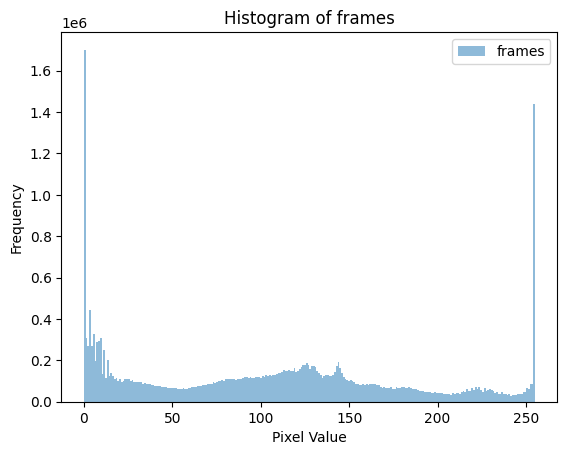

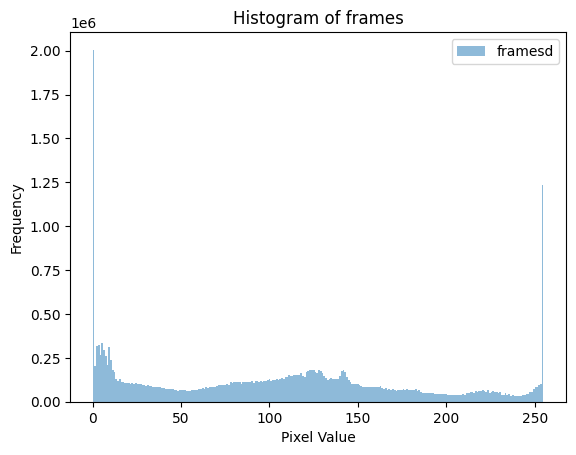

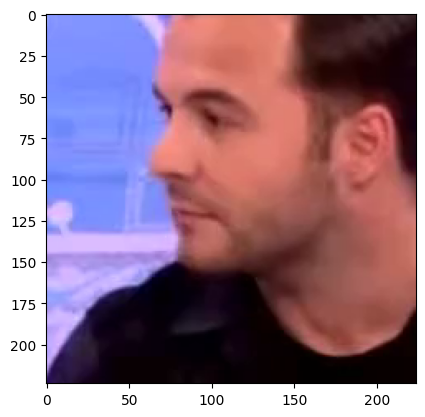

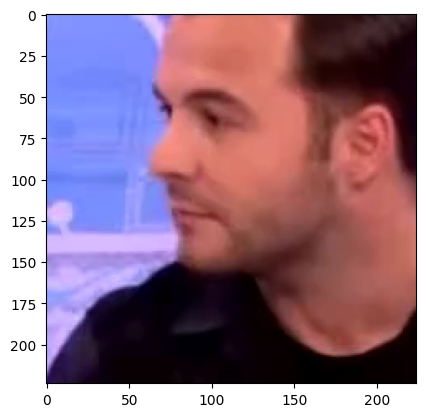

In [4]:
import numpy as np
# sample_path = '/home/mrwhite0racle/persist/data/vox2/test_output_resampled/id00017/7t6lfzvVaTM/00009.mp4'
sample_path = '/home/mrwhite0racle/persist/data/vox2/test/id07961/Qqkmag1M-wo/00201.mp4'
frames = read_video(sample_path, change_fps=False, reader='rsreader_fast')
framesd = read_video(sample_path, change_fps=False, reader='decord')

# Plot histograms of both
plt.hist(np.array(frames).flatten(), bins=256, range=(0, 255), alpha=0.5, label='frames')
plt.legend(loc='upper right')
plt.title('Histogram of frames')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
plt.hist(np.array(framesd).flatten(), bins=256, range=(0, 255), alpha=0.5, label='framesd')
plt.legend(loc='upper right')
plt.title('Histogram of frames')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(np.array(frames[0]))
plt.show()
plt.imshow(np.array(framesd[0]))
plt.show()

In [3]:
import torch_xla.core.xla_model as xm

/home/mrwhite0racle/miniconda3/envs/flaxdiff/lib/python3.11/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [ ]:
from pipecraft.utils.media import read_video
from pipecraft.utils.face_align import FaceAlignmentProcessor
from matplotlib import pyplot as plt

2025-04-07 22:17:27.997518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744064248.021710  371848 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744064248.029215  371848 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744064248.047391  371848 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744064248.047416  371848 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744064248.047418  371848 computation_placer.cc:177] computation placer alr

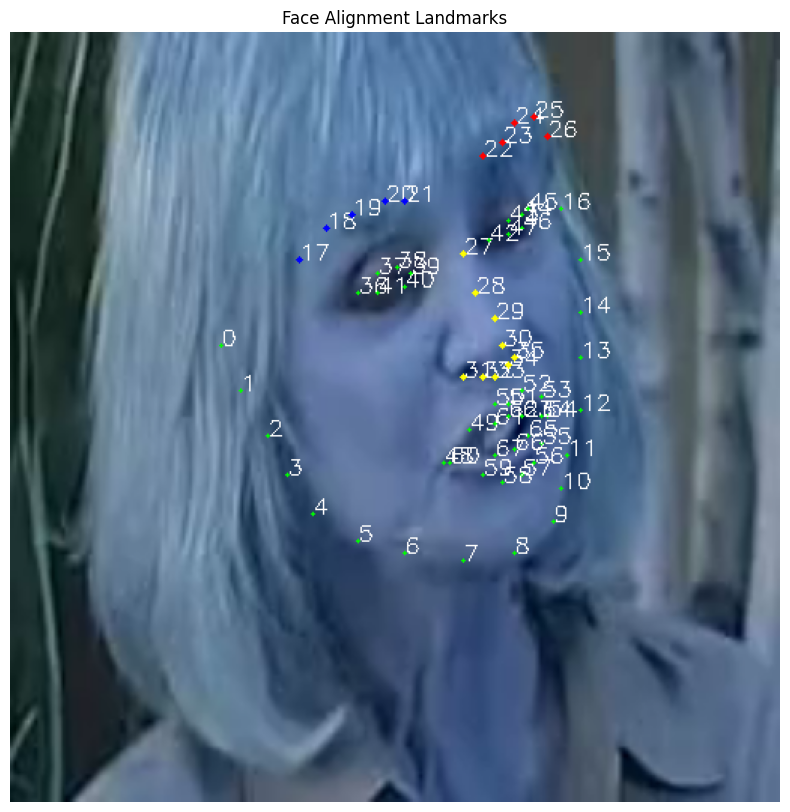

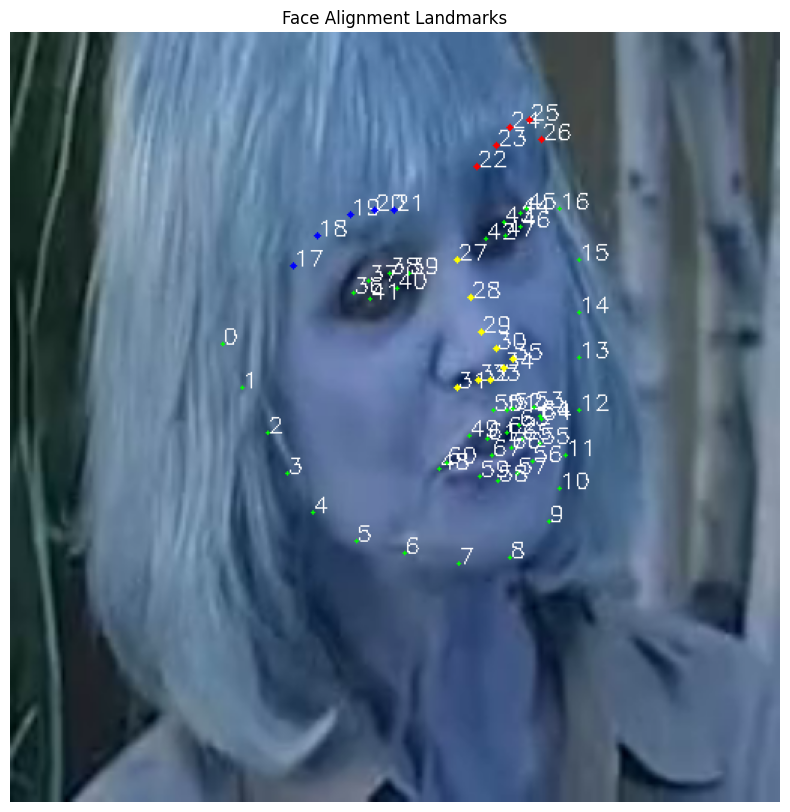

Aligned 2 frames from 282 frames


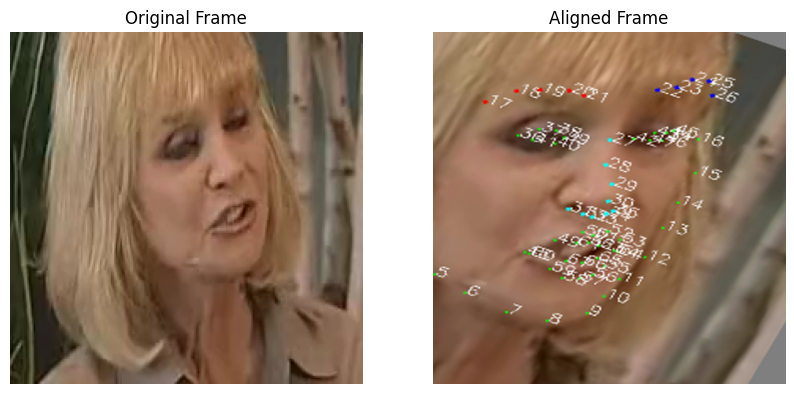

In [ ]:
sample_path = '/home/mrwhite0racle/persist/data/vox2/train/id00893/KRx85UrSui0/00041.mp4'
frames = read_video(sample_path, change_fps=False, reader='rsreader_fast')

aligner = FaceAlignmentProcessor(resolution=512, use_mediapipe=False)
aligned = aligner.process_frames(frames[:2], break_on_error=True)
print(f"Aligned {len(aligned)} frames from {len(frames)} frames")

# Display the original and aligned frames
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(frames[0])
plt.title("Original Frame")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(aligned[0])
plt.title("Aligned Frame")
plt.axis("off")
plt.show()

# super_aligned = aligner.process_frames(aligned, break_on_error=True)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(aligned[0])
# plt.title("Aligned Frame")
# plt.axis("off")
# plt.subplot(1, 2, 2)
# plt.imshow(super_aligned[0])
# plt.title("Super Aligned Frame")
# plt.axis("off")
# plt.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744063279.172984  361918 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744063279.194300  361930 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744063279.257041  361937 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


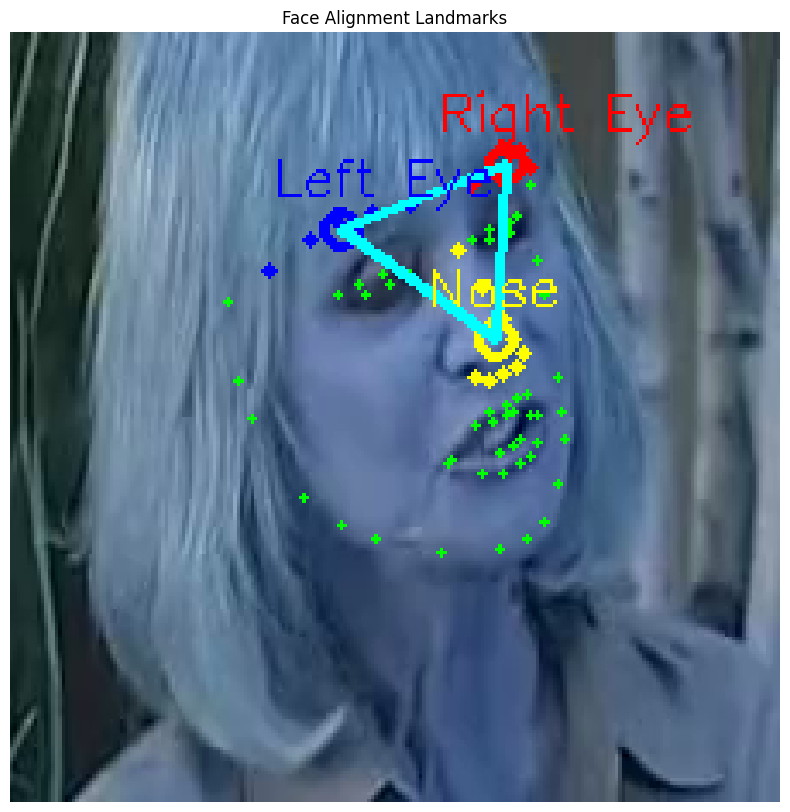

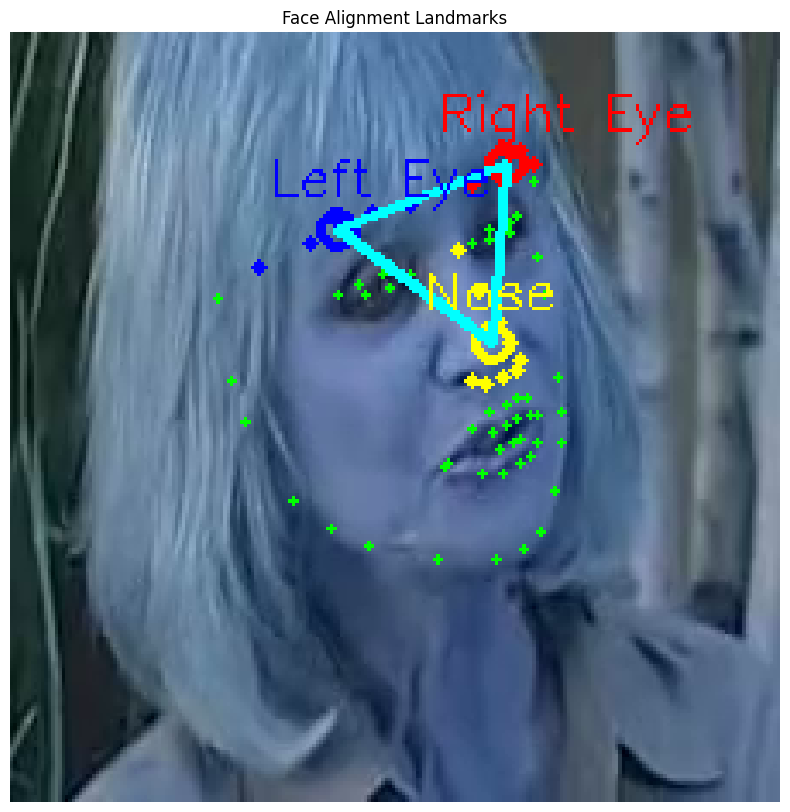

Aligned 2 frames from 282 frames


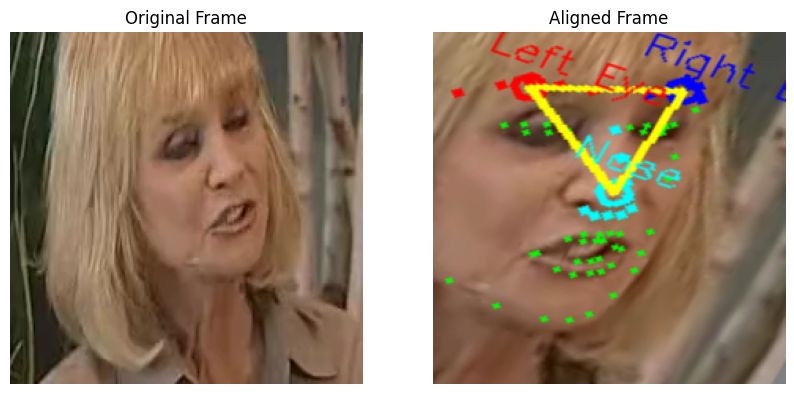

In [6]:
sample_path = '/home/mrwhite0racle/persist/data/vox2/train/id00893/KRx85UrSui0/00041.mp4'
frames = read_video(sample_path, change_fps=False, reader='rsreader_fast')

aligner = FaceAlignmentProcessor(resolution=256, use_mediapipe=True)
aligned = aligner.process_frames(frames[:2], break_on_error=True)
print(f"Aligned {len(aligned)} frames from {len(frames)} frames")

# Display the original and aligned frames
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(frames[0])
plt.title("Original Frame")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(aligned[0])
plt.title("Aligned Frame")
plt.axis("off")
plt.show()

# super_aligned = aligner.process_frames(aligned, break_on_error=True)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(aligned[0])
# plt.title("Aligned Frame")
# plt.axis("off")
# plt.subplot(1, 2, 2)
# plt.imshow(super_aligned[0])
# plt.title("Super Aligned Frame")
# plt.axis("off")
# plt.show()

In [1]:
from pipelines.voxceleb import run_pipeline

2025-04-05 05:09:59.285498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743829799.309918 1995619 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743829799.317586 1995619 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743829799.337086 1995619 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743829799.337111 1995619 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743829799.337113 1995619 computation_placer.cc:177] computation placer alr

Total video paths: 34327, Rank 0 has 34327


Writing videos:   0%|          | 0/34327 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743829802.669517 1995797 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829802.691372 1995813 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829802.866655 1995813 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


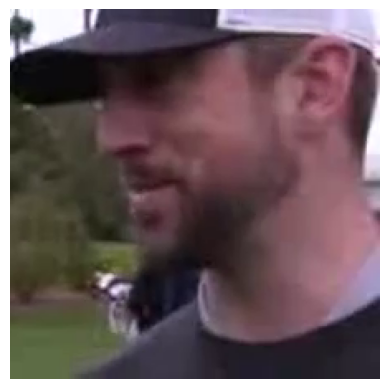

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00092.mp4, sucess_rate = 0.00


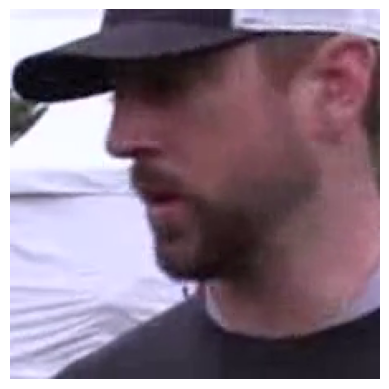

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00093.mp4, sucess_rate = 0.00


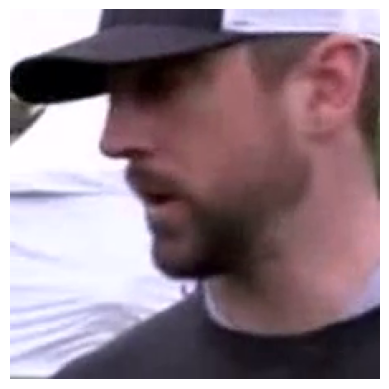

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/ddLPBVSzuPs/00103.mp4, sucess_rate = 0.00


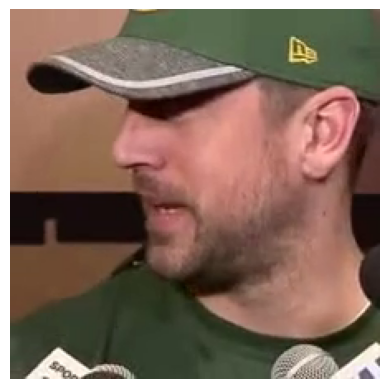

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00159.mp4, sucess_rate = 0.00


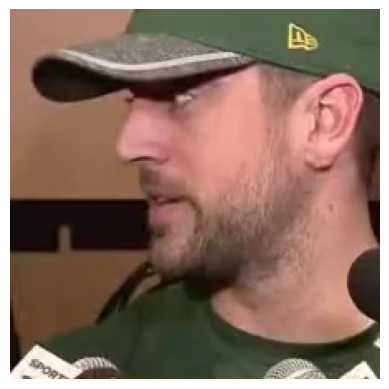

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00160.mp4, sucess_rate = 0.00


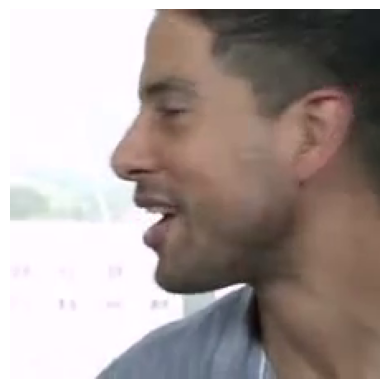

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00009.mp4, sucess_rate = 0.00


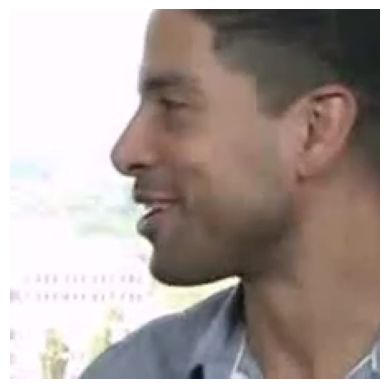

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00010.mp4, sucess_rate = 0.00


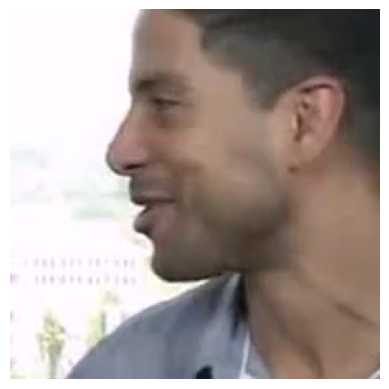

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00011.mp4, sucess_rate = 0.00


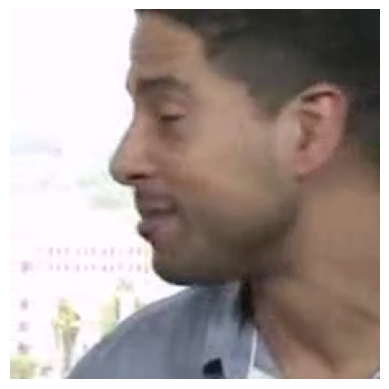

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00013.mp4, sucess_rate = 0.00


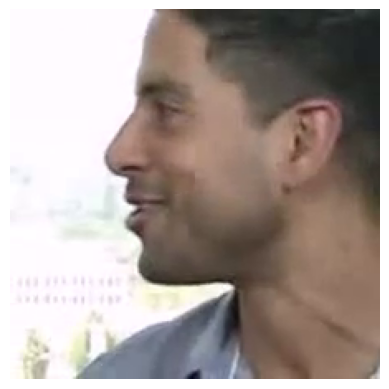

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00015.mp4, sucess_rate = 0.00


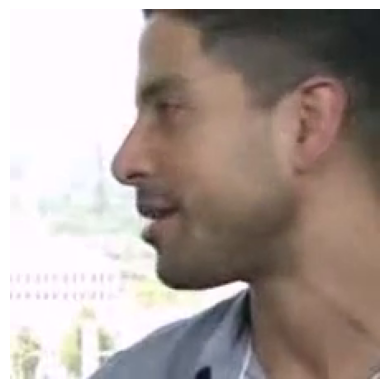

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00018.mp4, sucess_rate = 0.00


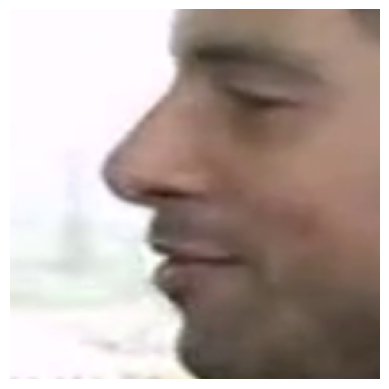

Error in face detection for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00019.mp4, sucess_rate = 0.00


Writing videos:   0%|          | 3/34327 [00:22<55:53:31,  5.86s/it] 

In [ ]:
run_pipeline(
    input_dir='/home/mrwhite0racle/persist/data/vox2/test/',
    output_dir='/home/mrwhite0racle/persist/data/vox2/test_output/',
    process_temp_dir='/home/mrwhite0racle/persist/data/vox2/temp/',
    num_processes=1,
    num_workers_per_process=1,
    # use_wandb=True,
)

In [4]:
from pipecraft.utils.hyper_iqa import HyperNet, TargetNet
import torchvision#
import torch
import torch_xla.core.xla_model as xm

/home/mrwhite0racle/miniconda3/envs/flaxdiff/lib/python3.11/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [2]:
print(xm.get_xla_supported_devices("TPU"))

['xla:0', 'xla:1', 'xla:2', 'xla:3']


/home/mrwhite0racle/miniconda3/envs/flaxdiff/lib/python3.11/site-packages/torch_xla/core/xla_model.py:99: UserWarning: `devkind` argument is deprecated and will be removed in a future release.
  warnings.warn("`devkind` argument is deprecated and will be removed in a "


In [5]:
def load_hyper_model(device):
    model_hyper = HyperNet(16, 112, 224, 112, 56, 28, 14, 7).to(device)
    model_hyper.train(False)

    # load the pre-trained model on the koniq-10k dataset
    model_hyper.load_state_dict(
        (torch.load("util_models/koniq_pretrained.pkl", map_location="cpu", weights_only=True))
    )
    model_hyper = model_hyper.to(device)
    model_hyper.eval()
    return model_hyper

def get_hyperiqa_score(video_frames, model_hyper, device):
    with torch.no_grad():
        if not isinstance(video_frames, torch.Tensor):
            video_frames = torch.tensor(video_frames, dtype=torch.float32)
        transforms = torchvision.transforms.Compose(
            [
                torchvision.transforms.CenterCrop(size=224),
                torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ]
        )
                
        video_frames = transforms(video_frames)
        # If video_frames is not a tensor, convert it to a tensor
        video_frames = video_frames.to(device)
        paras = model_hyper(video_frames)  # 'paras' contains the network weights conveyed to target network

        # Building target network
        model_target = TargetNet(paras).to(device)
        for param in model_target.parameters():
            param.requires_grad = False

        # Quality prediction
        pred = model_target(paras["target_in_vec"])  # 'paras['target_in_vec']' is the input to target net

        # quality score ranges from 0-100, a higher score indicates a better quality
        quality_score = pred.mean().item()
    return quality_score

In [8]:
from pipecraft.utils.media import read_video
from einops import rearrange
import numpy as np


In [11]:

sample_path = '/home/mrwhite0racle/persist/data/vox2/test/id07961/Qqkmag1M-wo/00201.mp4'
frames = read_video(sample_path, change_fps=False, reader='rsreader_fast')
device = xm.xla_device()

model_hyper = load_hyper_model("cpu").to(device)

In [27]:
model_hyper = model_hyper.to(xm.xla_device())

In [ ]:
first_frame = frames[0]
middle_frame = frames[len(frames) // 2]
last_frame = frames[-1]
video_frames = np.stack([first_frame, middle_frame, last_frame], axis=0)
video_frames = torch.from_numpy(rearrange(video_frames, "b h w c -> b c h w"))
video_frames = video_frames / 255.0

score = get_hyperiqa_score(video_frames, model_hyper, xm.xla_device())
print(f"Hyper-IQA score: {score}")

Hyper-IQA score: 31.1080322265625


: 

In [8]:
!ls ~/persist/data/vox2/train_filtered/id00893/KRx85UrSui0/00041.mp4

/home/mrwhite0racle/persist/data/vox2/train_filtered/id00893/KRx85UrSui0/00041.mp4


In [3]:
import jax.numpy as jnp

def selu(x, alpha=1.67, lmbda=1.05):
  return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

x = jnp.arange(5.0)
print(selu(x))

[0.        1.05      2.1       3.1499999 4.2      ]


In [4]:
x.devices()

{TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0)}

In [ ]:
import os
import mmap
from pathlib import Path
from concurrent.futures import ProcessPoolExecutor
import functools

def find_mp4_files_chunk(dir_chunk, suffix=".mp4"):
    """Process a chunk of directories to find mp4 files."""
    results = []
    for dir_path in dir_chunk:
        try:
            # Get all items in directory without recursion
            with os.scandir(dir_path) as it:
                for entry in it:
                    if entry.is_file() and entry.name.endswith(suffix):
                        results.append(entry.path)
                    elif entry.is_dir():
                        # Add directory to be processed
                        results.extend(find_mp4_files_chunk([entry.path], suffix))
        except (PermissionError, FileNotFoundError):
            pass
    return results

def chunk_directories(root_dir, chunk_size=100):
    """Split directories into chunks for parallel processing."""
    dirs = [root_dir]
    chunk_dirs = []
    
    # Collect top-level directories first
    with os.scandir(root_dir) as it:
        for entry in it:
            if entry.is_dir():
                dirs.append(entry.path)
    
    # Create chunks
    for i in range(0, len(dirs), chunk_size):
        chunk_dirs.append(dirs[i:i + chunk_size])
    
    return chunk_dirs if chunk_dirs else [dirs]

def fast_file_exists(path):
    """Extremely fast file existence check."""
    try:
        os.stat(path)
        return True
    except FileNotFoundError:
        return False

def gather_video_paths_ultra_fast(input_dir, output_dir, workers=None, chunk_size=100):
    """
    Ultra-optimized function to gather video paths.
    
    Args:
        input_dir: Input directory to search for videos
        output_dir: Output directory to check for existing videos
        workers: Number of worker processes (defaults to CPU count)
        chunk_size: Number of directories to process in each worker chunk
    
    Returns:
        Sorted list of (input_path, output_path) tuples
    """
    input_dir = os.path.abspath(input_dir)
    output_dir = os.path.abspath(output_dir)
    
    # Use all available CPUs by default
    workers = workers or os.cpu_count()
    
    # Step 1: Split the directory tree into chunks for parallel processing
    dir_chunks = chunk_directories(input_dir, chunk_size)
    
    # Step 2: Find all mp4 files in parallel
    video_input_paths = []
    with ProcessPoolExecutor(max_workers=workers) as executor:
        chunk_results = executor.map(find_mp4_files_chunk, dir_chunks)
        for result in chunk_results:
            video_input_paths.extend(result)
    
    # Step 3: Sort input paths (single sort operation)
    video_input_paths.sort()
    
    # Step 4: Prepare output paths and filter existing files
    video_paths = []
    input_prefix_len = len(input_dir) + 1  # +1 for the trailing slash
    
    # Process paths in batches to avoid GIL contention
    batch_size = 1000
    for i in range(0, len(video_input_paths), batch_size):
        batch = video_input_paths[i:i+batch_size]
        
        with ProcessPoolExecutor(max_workers=workers) as executor:
            # Create a function that captures the current context
            def process_path(input_path):
                rel_path = input_path[input_prefix_len:]
                output_path = os.path.join(output_dir, rel_path)
                if not fast_file_exists(output_path):
                    return (input_path, output_path)
                return None
            
            # Process batch in parallel
            results = executor.map(process_path, batch)
            for result in results:
                if result:
                    video_paths.append(result)
    
    return video_paths

# Memory-mapped file existence cache for repeated calls
class FileExistenceCache:
    def __init__(self, capacity=100000):
        self.cache = {}
        self.capacity = capacity
    
    def file_exists(self, path):
        if path in self.cache:
            return self.cache[path]
        
        exists = fast_file_exists(path)
        
        # Manage cache size
        if len(self.cache) >= self.capacity:
            # Simple eviction - clear half the cache when full
            keys = list(self.cache.keys())[:self.capacity//2]
            for k in keys:
                del self.cache[k]
        
        self.cache[path] = exists
        return exists

# Use this if repeatedly checking the same directories
file_cache = FileExistenceCache()

def gather_video_paths_cached(input_dir, output_dir, workers=None):
    """Version with file existence caching for repeated calls"""
    input_dir = os.path.abspath(input_dir)
    output_dir = os.path.abspath(output_dir)
    
    # Use all CPUs by default
    workers = workers or os.cpu_count()
    
    # Find all mp4 files using a more efficient approach
    video_input_paths = []
    for root, _, files in os.walk(input_dir, followlinks=False):
        for file in files:
            if file.endswith(".mp4"):
                video_input_paths.append(os.path.join(root, file))
    
    # Sort once
    video_input_paths.sort()
    
    # Process in larger batches with caching
    video_paths = []
    input_prefix_len = len(input_dir) + 1
    
    for input_path in video_input_paths:
        rel_path = input_path[input_prefix_len:]
        output_path = os.path.join(output_dir, rel_path)
        
        if not file_cache.file_exists(output_path):
            video_paths.append((input_path, output_path))
    
    return video_paths

Testing with input_dir=/home/mrwhite0racle/persist/data/vox2/test/, output_dir=/home/mrwhite0racle/persist/data/vox2/test_2/
Original function found 36237 files in 8.73 seconds
Pathlib version found 36237 files in 0.90 seconds


AttributeError: Can't pickle local object 'gather_video_paths_ultra_fast.<locals>.process_path'